The number of tuples in flavors_of_cacao.csv are:  0
The number of unique company names is:  416
The number of reviews made in 2013 is:  184
The number of missing bean types is:  887


Text(0, 0.5, 'Num ratings')

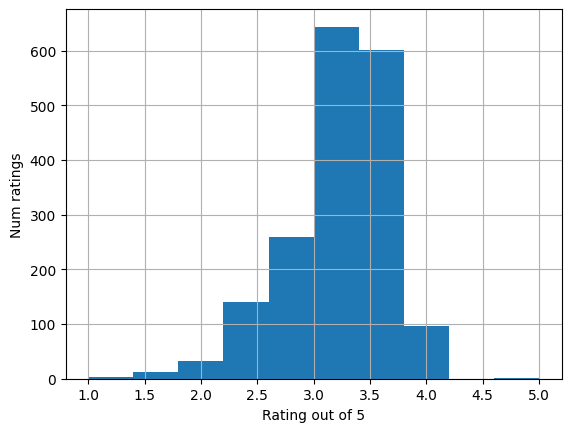

In [124]:
import pandas as pd
import numpy as np

FILE = 'flavors_of_cacao.csv'

df = pd.read_csv(FILE)
df = df.dropna()
df.columns = [col.replace("\n", " ") for col in df.columns.to_list()]
df = df.rename(columns={df.columns[0]: "Maker"})
tuples = df.groupby(list(df.columns)).size()
count = 0
for t in tuples.values:
    if (t>1):
        count+=t
print("The number of tuples in %s are: "%FILE, count)
names = df.groupby(df['Maker']).size()
print("The number of unique company names is: ", len(names))
reviews_2013 = df[df['Review Date'] == 2013]
print("The number of reviews made in 2013 is: ", len(reviews_2013))
df = df.replace(r'^\s*$', "", regex=True) #holy, matching the missing whitespace is annoying
empty_bean_types = df[df['Bean Type'] == ""]
print("The number of missing bean types is: ", len(empty_bean_types))
h = df['Rating'].hist()
h.set_xlabel('Rating out of 5')
h.set_ylabel('Num ratings')

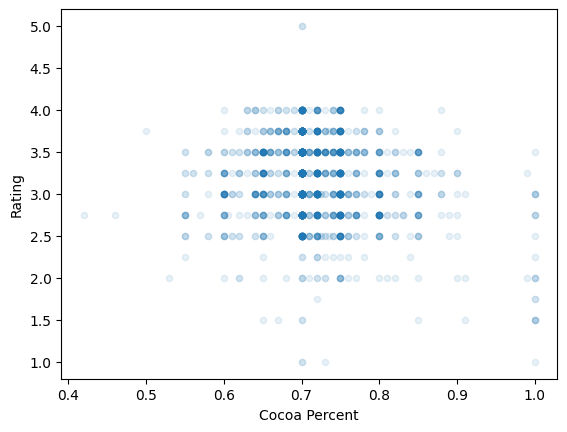

In [125]:
''' looks like an asymmetric distribution with a bit of a high bias, peaking around 3.25 / 5. '''

def convert_percentage(s):
    if isinstance(s, float):
        return s
    return float(s.strip('%'))/100

df['Cocoa Percent'] = df['Cocoa Percent'].apply(convert_percentage)

plot = df.plot.scatter(y='Rating', x='Cocoa Percent', alpha=0.1)

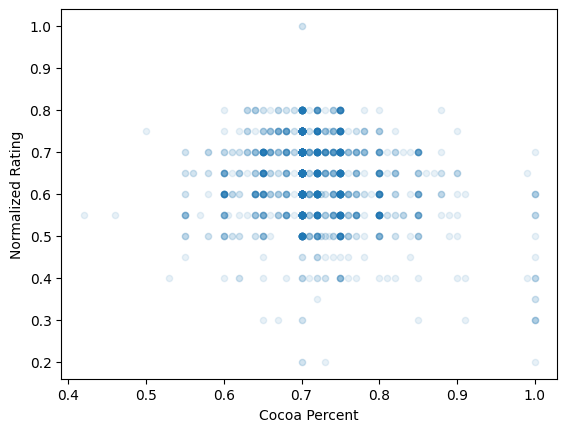

In [126]:
'''Looks like higher ratings tend to be clustered between 0.6-0.8 percent cocoa.
Too high or too low, and the ratings fall off. There's a bit of a sweet spot at 0.7 cocoa (although it looks controversial)'''

df['Normalized Rating'] = df['Rating'] / 5.0
plot = df.plot.scatter(x='Cocoa Percent', y='Normalized Rating', alpha=0.1)

In [127]:
scores = df[['Maker', 'Rating']].groupby(['Maker']).mean().sort_values('Rating', ascending=False)
print(scores) # every company/maker's average rating out of 5, from highest to lowest

                                        Rating
Maker                                         
Tobago Estate (Pralus)                4.000000
Heirloom Cacao Preservation (Zokoko)  3.875000
Ocelot                                3.875000
Amedei                                3.846154
Matale                                3.812500
...                                        ...
Majani                                2.000000
Love Bar                              2.000000
Callebaut                             1.875000
Machu Picchu Trading Co.              1.875000
Cote d' Or (Kraft)                    1.000000

[416 rows x 1 columns]


In [ ]:
def encodeOneHot(df, col: str, prefix: str = None):
    df = pd.concat([df, pd.get_dummies(df[col], dtype=float, prefix=prefix)], axis=1)
    df = df.drop(col, axis=1)
    return df

df = encodeOneHot(df, ['Maker', 'Company Location'])
print(df.head(2))

''' Here I used One Hot Encoding for the company and location columns but.... depending on the model it
might be better to use label encoding, so long as the model doesn't think there's a natural order'''

  Specific Bean Origin or Bar Name   REF  Review Date  Cocoa Percent  Rating  \
0                      Agua Grande  1876         2016           0.63    3.75   
1                            Kpime  1676         2015           0.70    2.75   

  Bean Type Broad Bean Origin  Normalized Rating  Maker_A. Morin  Maker_AMMA  \
0                    Sao Tome               0.75             1.0         0.0   
1                        Togo               0.55             1.0         0.0   

   ...  Company Location_Spain  Company Location_St. Lucia  \
0  ...                     0.0                         0.0   
1  ...                     0.0                         0.0   

   Company Location_Suriname  Company Location_Sweden  \
0                        0.0                      0.0   
1                        0.0                      0.0   

   Company Location_Switzerland  Company Location_U.K.  \
0                           0.0                    0.0   
1                           0.0            